In [1]:
#data generation for lorenz system
import numpy as np
import scipy.integrate
import random

random.seed(32)  # Python random seed
np.random.seed(32)  # NumPy random seed

print("Generating data")
# Simulation variables
seq_length = 1001 # Number of time steps in each sequence
num_records = 50 # Number of sequences to generate
dim_y = 1  # No. of observables
dim_x= 3 # Number of states
dt=0.1
end_t=seq_length*dt

# Arrays to store results
X_data_array = np.empty((num_records, seq_length, dim_x))
Y_data_array = np.empty((num_records, seq_length, dim_y))

# Continuous-time model
def f(t,x,s,r,b):
    x1,x2,x3=x
    dx_dt = [0,0,0]
    dx_dt[0] = -(s*x1)+(s*x2)
    dx_dt[1] = (r*x1)-x2-(x1*x3) 
    dx_dt[2] = (x1*x2)-(b*x3)
    return dx_dt

# Parameters
s=10
r=28
b=8/3
 
P=0.0001*np.identity(dim_x) #covariance of initial condition
mu_pn = np.zeros(dim_x) #mean of process noise
Q=0.01*np.identity(dim_x) #process noise covariance
mu_mn=np.zeros(dim_y) #mean of measurement noise
R=[0.01] #measurement noise covariance
G=np.identity(dim_x) #process noise coefficient matrix
H=np.matrix(([[1],[1],[0]]))
t_span= np.arange(0,end_t,dt)
num_timesteps=np.shape(t_span)[0]

for i in range(0, num_records, 1):
    mu_x0=np.random.uniform(-2,2,size=dim_x) #mean of initial condition
    print(mu_x0)
    x0_old=np.random.multivariate_normal(mu_x0,P)
    sol=scipy.integrate.solve_ivp(f,(0,end_t),x0_old, method='RK45', args=(s,r,b),dense_output=True, t_eval=np.arange(0, end_t, dt))
    X_data_array[i,:,:]=np.transpose(sol.y)
    for j in range(1,seq_length,1):
        w=np.random.multivariate_normal(mu_pn,Q) 
        X_data_array[i,j,:]=X_data_array[i,j,:]+np.matmul(G,w)
        v=np.random.normal(mu_mn,R)   #change to multivariate if R has greater than 1 dimension
        Y_data_array[i,j,:]=np.matmul(X_data_array[i,j,:],H)+v
        
np.savez("lorenz_data.npz", X_data=X_data_array, Y_data=Y_data_array)

Generating data
[ 1.43555707 -0.50915538  0.22051511]
[-1.56681569  1.29754214 -0.17680309]
[-1.87830018  1.4107403   0.66159675]
[-0.22923786  0.523516    1.37479336]
[ 0.21556392 -1.37816681  0.26646873]
[0.29025194 0.55184518 0.98477667]
[ 1.06716679 -0.93377928 -0.53772949]
[ 0.84379746 -1.99627158  0.82048034]
[ 0.75457566 -1.69907352  0.76228022]
[1.15444198 0.18934587 0.92768323]
[ 0.74962694  1.72253377 -0.19195264]
[-0.95884638  0.78209991 -0.96732982]
[-0.637217    0.33001082 -1.98748458]
[-0.46556676 -1.38460891 -0.28948837]
[ 1.02171932 -1.89965362 -0.26238115]
[ 0.9299982  -1.1146079  -1.05901131]
[-0.67491537 -1.39376881 -1.95225058]
[-0.05863833  0.83750538  1.27451372]
[-0.99942956  1.73541585 -1.12461313]
[ 0.89005168 -0.72197843 -1.53193588]
[-1.94344146 -1.11940506  1.94277087]
[-1.08182674  0.28468278 -1.02003778]
[-0.97295863 -1.14703716  1.72640775]
[ 1.92326686 -1.79491508  0.08504458]
[-0.39540941 -0.39992387 -1.01539221]
[ 1.18516244 -1.71223124 -0.50320965]
[0

In [2]:
# Arrays to store results
X_data_array_diff_ic = np.empty((num_records, seq_length, dim_x))
Y_data_array_diff_ic = np.empty((num_records, seq_length, dim_y))
#random initial condition
for i in range(0, num_records, 1):
    mu_x0=np.random.uniform(-10,10,size=dim_x) #mean of initial condition
    x0_old=np.random.multivariate_normal(mu_x0,P)
    sol=scipy.integrate.solve_ivp(f,(0,end_t),x0_old, method='RK45', args=(s,r,b),dense_output=True, t_eval=np.arange(0, end_t, dt))
    X_data_array_diff_ic[i,:,:]=np.transpose(sol.y)
    for j in range(1,seq_length,1):
        w=np.random.multivariate_normal(mu_pn,Q) 
        X_data_array_diff_ic[i,j,:]=X_data_array_diff_ic[i,j,:]+np.matmul(G,w)
        v=np.random.normal(mu_mn,R)   #change to multivariate if R has greater than 1 dimension
        Y_data_array_diff_ic[i,j,:]=np.matmul(X_data_array_diff_ic[i,j,:],H)+v
        
np.savez("lorenz_data_diff_ic.npz", X_data=X_data_array_diff_ic, Y_data=Y_data_array_diff_ic)

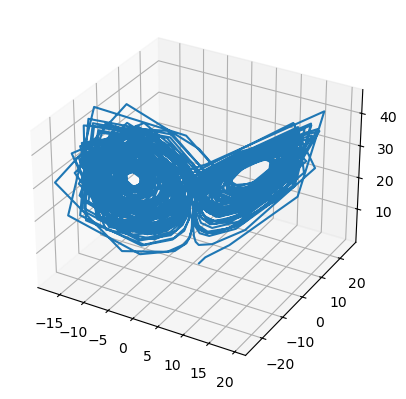

In [3]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot3D(X_data_array[0,:,0],X_data_array[0,:,1],X_data_array[0,:,2])